In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import metrics

Answer 1

In [2]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [3]:
for i in range(2,5):
    pred=KMeans(n_clusters=i,random_state=123).fit_predict(X_std)
    print("Silhouette score for {} clusters k-means: {}".format(i,metrics.silhouette_score(X_std,pred,metric="euclidean")))

Silhouette score for 2 clusters k-means: 0.5817500491982808
Silhouette score for 3 clusters k-means: 0.45994823920518635
Silhouette score for 4 clusters k-means: 0.383850922475103


Silhouette score is the best for 2 clusters.
For solution of the 2 clusters(ground truth),it appears to produce data point sets that are closer than data points in other clusters.

Answer 2-a

In [4]:
df=pd.read_csv('C:\\Users\\Goksun\\Downloads\\heart.csv')
df = df.iloc[0:300]

In [5]:
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [6]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(X_std,X_pca,test_size=0.5,random_state=123)

In [7]:
ypred=pd.DataFrame()
ypred['pca_f1' + '_sample0'] = X_pcahalf1[:, 0]
ypred['pca_f2' + '_sample0'] = X_pcahalf1[:, 1]
for nclust in range(2, 5):
    pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(X_half1)
    ypred['clust' + str(nclust) + '_sample0'] = pred

In [8]:
ypred['pca_f1' + '_sample1'] = X_pcahalf2[:, 0]
ypred['pca_f2' + '_sample1'] = X_pcahalf2[:, 1]
for nclust in range(2, 5):
    pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(X_half2)
    ypred['clust' + str(nclust) + '_sample1'] = pred

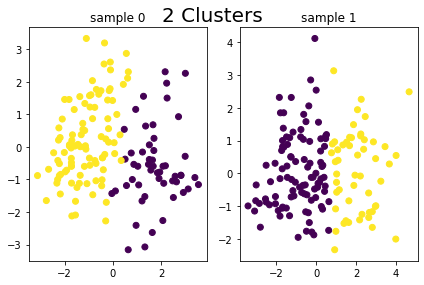

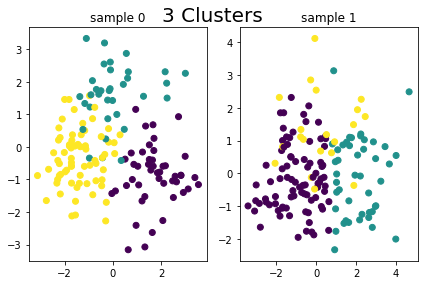

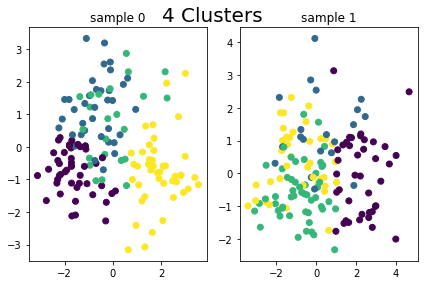

In [9]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
        axarr[i].set_xlim()
        axarr[i].set_ylim()
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()

Solution of only the 2 clusters have appeared consistent across sub-samples.

Answer 2-b

In [10]:
for i in range(2,5):
    pred_=KMeans(n_clusters=i,random_state=123).fit_predict(X_std)
    print("ARI for {} clusters k-means: {}".format(i,metrics.adjusted_rand_score(y,pred_)))

ARI for 2 clusters k-means: 0.398774396752417
ARI for 3 clusters k-means: 0.2538892230216106
ARI for 4 clusters k-means: 0.17940671329382532


We want to be high of ARI values. For this reason , the best cluster number is 2 clusters.

Answer 2-c

In [11]:
for i in range(2,5):
    pred=KMeans(n_clusters=i,random_state=123).fit_predict(X_std)
    print("Silhouette score for {} cluster k-means: {}".format(i,metrics.silhouette_score(X_std, pred, metric='euclidean')))

Silhouette score for 2 cluster k-means: 0.16635659364235417
Silhouette score for 3 cluster k-means: 0.11797508530015563
Silhouette score for 4 cluster k-means: 0.1228802309243315


We want to be low of Silhouette value. Our metric has returned incorrect number of cluster. In fact, it should be 2 clusters.